<a href="https://colab.research.google.com/github/BryankaJordan/Big-Data-Mining/blob/main/UAS_Big_Data_dan_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama :Bryanka Jordaneo Vanky Heizer<br />
NIM  :22.11.5010<br />

# Soal Ujian (disesuaikan dengan sifat ujian)

1.Buat Sebuah Model , dengan ketentuan sebagai berikut:
( SCPMK 1682108 point  20)

a. Wajib menggunakan dataset public.
 ( SCPMK 1683914 point  20)

b. Proses mining wajib menerapkan kaidah(tahapan) dari data mining, mulai dari preprocessing sampai dengan metric evaluation.
( SCPMK 1681902 point  20)

c. Konsep mining boleh menggunakan pendekatan Predictive Analytics maupun Descriptive Analytics (Regresi, Klasifikasi, Time series Analysis, Association rule mining, Clustering, ataupun Sequence Discovery).
( SCPMK 1682111 point  20)

d. Tidak boleh menggunakan algoritma yang pernah dijadikan studikasus di kelas. ( SCPMK 1682310 point  20)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage


In [2]:
# 1. Load Dataset
data = pd.read_csv('/content/Obesity prediction.csv')

In [3]:
# 2. Exploratory Data Analysis (EDA) and Preprocessing
print("Dataset Info:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Drop rows with missing values (if any)
data_cleaned = data.dropna()

# Select numerical columns for clustering
numerical_cols = data_cleaned.select_dtypes(include=[np.number]).columns
data_numerical = data_cleaned[numerical_cols]

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numerical)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), obje


Data Types after cleaning:
Gender             object
Age               float64
Height            float64
Weight            float64
family_history     object
FAVC               object
FCVC              float64
NCP               float64
CAEC               object
SMOKE              object
CH2O              float64
SCC                object
FAF               float64
TUE               float64
CALC               object
MTRANS             object
Obesity            object
dtype: object

Shape of the cleaned dataset: (2111, 17)


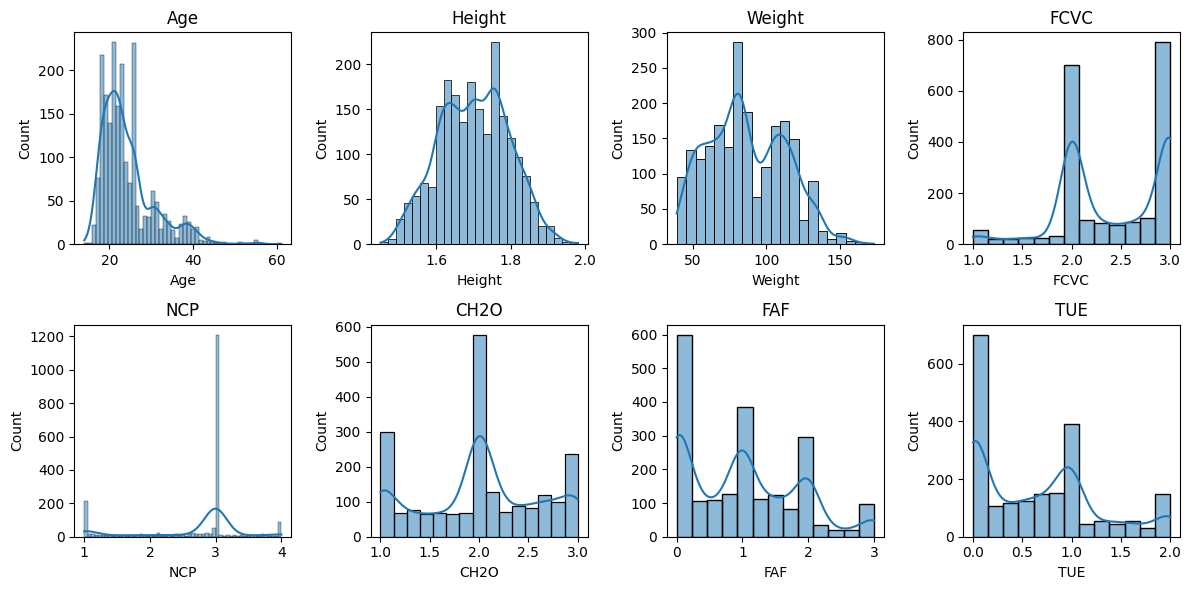

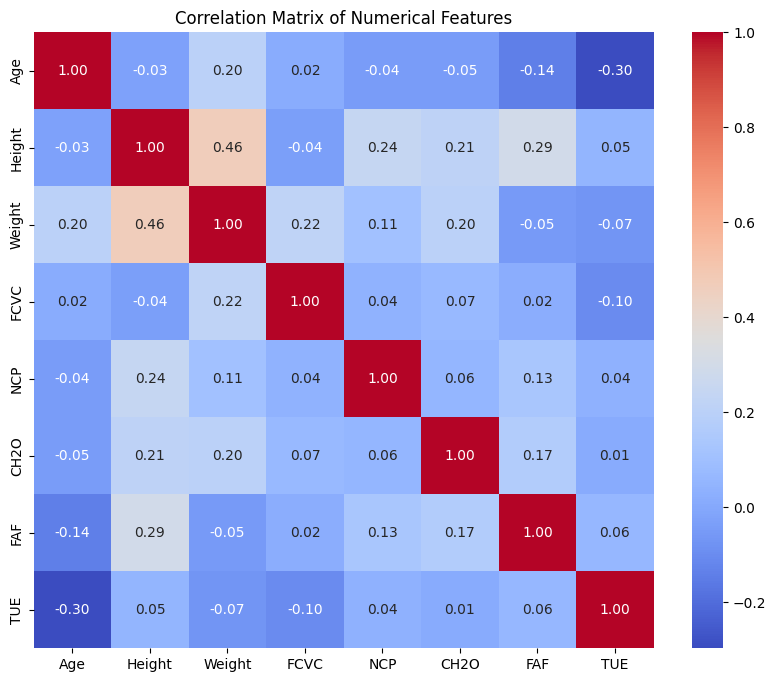

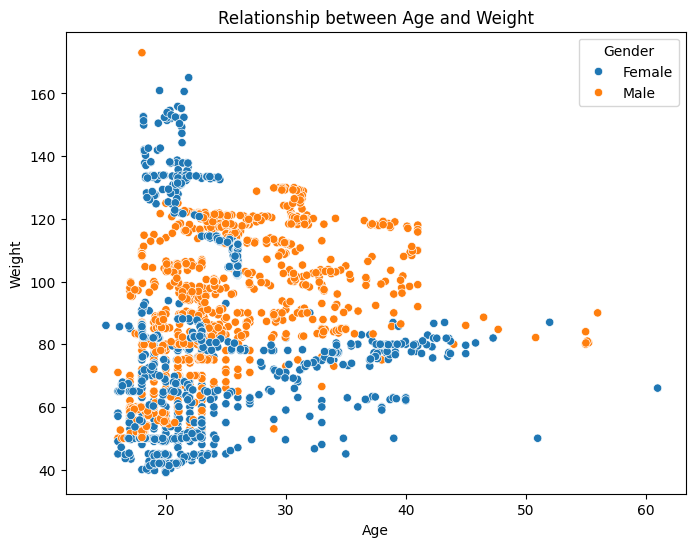

In [4]:
# Continue EDA after preprocessing
print("\nData Types after cleaning:")
print(data_cleaned.dtypes)

print("\nShape of the cleaned dataset:", data_cleaned.shape)

# Explore the distribution of key features
plt.figure(figsize=(12, 6))
for i, col in enumerate(data_numerical.columns):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data_cleaned[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Analyze relationships between features (correlation matrix)
plt.figure(figsize=(10, 8))
correlation_matrix = data_numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#Example: Investigate relationship between 'Age' and 'Weight'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Weight', data=data_cleaned, hue='Gender')
plt.title('Relationship between Age and Weight')
plt.show()

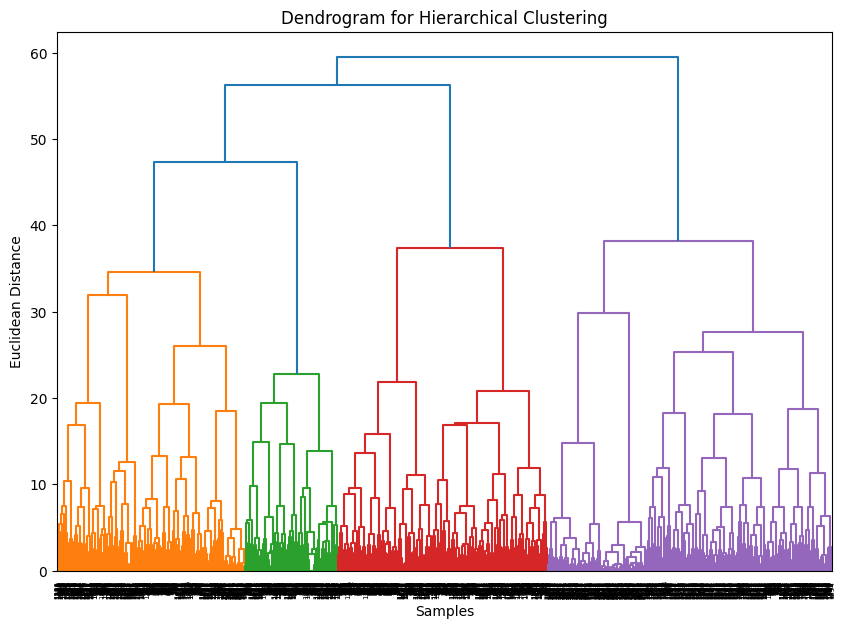

In [5]:
# 3. Apply Hierarchical Clustering
# Perform linkage for dendrogram
linked = linkage(data_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

# Fit Agglomerative Clustering
n_clusters = 3  # You can adjust the number of clusters based on dendrogram
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
clusters = hierarchical.fit_predict(data_scaled)

# Add cluster labels to the original dataset
data_cleaned['Cluster'] = clusters

In [6]:
from scipy.stats import spearmanr

# Seleksi Fitur dengan Spearman Rank Correlation
# Hitung korelasi Spearman antara fitur numerik dan kolom 'Weight'
correlation_with_weight = []
for col in numerical_cols:
    if col != 'Weight':  # Hindari menghitung korelasi dengan dirinya sendiri
        correlation, p_value = spearmanr(data_cleaned[col], data_cleaned['Weight'])
        correlation_with_weight.append((col, correlation, p_value))

# Buat DataFrame dari hasil korelasi
correlation_df = pd.DataFrame(correlation_with_weight, columns=['Feature', 'Spearman Correlation', 'P-value'])

# Tampilkan hasil
print("\nKorelasi Spearman dengan 'Weight':")
print(correlation_df)

# Tentukan ambang batas korelasi (misalnya, 0.1)
threshold = 0.1

# Pilih fitur dengan korelasi di atas ambang batas
selected_features = correlation_df[abs(correlation_df['Spearman Correlation']) >= threshold]['Feature'].tolist()
print("\nFitur yang terpilih (Korelasi Spearman >= 0.1):")
print(selected_features)

#Lanjutkan proses clustering atau modeling dengan fitur terpilih
data_selected = data_cleaned[selected_features + ['Weight']]


Korelasi Spearman dengan 'Weight':
  Feature  Spearman Correlation        P-value
0     Age              0.356771   2.167390e-64
1  Height              0.462548  2.116846e-112
2    FCVC              0.208417   3.790023e-22
3     NCP              0.002875   8.949591e-01
4    CH2O              0.225592   9.165341e-26
5     FAF             -0.043871   4.385658e-02
6     TUE             -0.049870   2.194247e-02

Fitur yang terpilih (Korelasi Spearman >= 0.1):
['Age', 'Height', 'FCVC', 'CH2O']


In [19]:
# 4. Evaluate the Clustering
# Calculate silhouette score
silhouette_avg = silhouette_score(data_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.18532669141490912


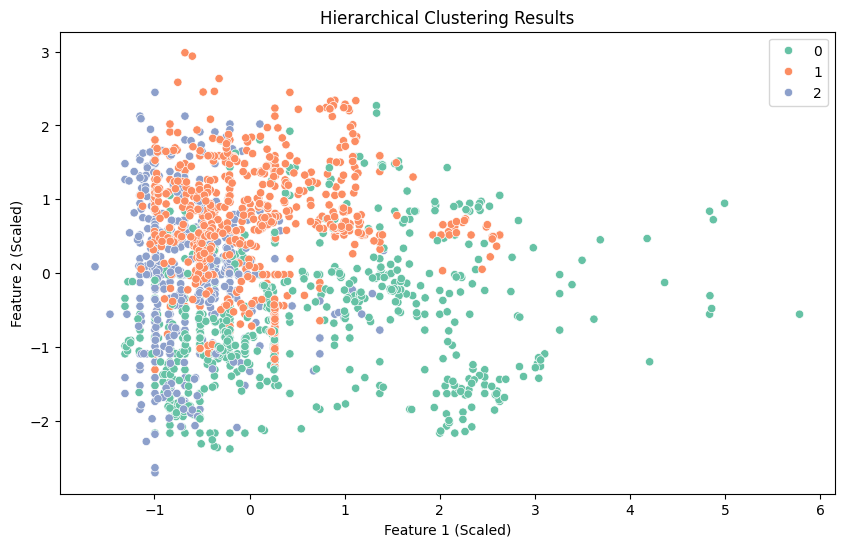

In [8]:
# 5. Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters, palette="Set2", legend="full"
)
plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.show()